# Exercise 4

## 1. Periodically Driven, Viscously Damped Pednulum

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.integrate import solve_ivp

%matplotlib inline

In [0]:
def forced_pendulum(t, u, g, m, w):
    u_1 = u[0]
    u_2 = u[1]
    u_3 = u[2]
    
    f_1 = u_2
    f_2 = -2. * g * u_2 - np.sin(u_1) + m * np.sin(w * u_3)
    f_3 = 1.
    
    return [f_1, f_2, f_3]

In [0]:
def plot_pendulum_solution(solution, params=None):
    N = len(solution.y[0])
    cmap = plt.cm.jet(np.linspace(0, 1, N))
    cbar = plt.cm.jet
    norm = mpl.colors.Normalize(vmin=solution.t[0], vmax=solution.t[-1])

    fig = plt.figure()
    ax1 = plt.subplot2grid((3, 1), (0, 0))
    ax2 = plt.subplot2grid((3, 1), (1, 0), rowspan=2)
    cax = ax1.twinx()
    mpl.colorbar.ColorbarBase(cax, cmap=cbar, norm=norm, orientation='horizontal')
    cax.set_ylim(0,20000)
    
    if params:
        ax1.set_title(r'$\mu = {},\ \gamma = {},\ \omega = {}$'.format(*params))

    ax1.plot(solution.y[2], solution.y[0], label=r'$u_1$')
    ax1.plot(solution.y[2], solution.y[1], label=r'$u_2$')
    
    ax1.set_xlabel(r'time $t$')
    ax1.set_ylabel(r'$u_i$')

    ax1.legend(markerscale=20, framealpha=1, loc=1)

    ax1.set_xlim(solution.t[0], solution.t[-1])
    ax1.set_ylim(-np.pi, np.pi)

    ax2.scatter(*solution.y[:2], s=1, marker='.', c = cmap)
    
    ax2.set_xlabel(r'$u_1$')
    ax2.set_ylabel(r'$u_2$')

    ax2.set_xlim(-np.pi, np.pi)
    
    print(cax.get_ylim())
    
    fig.set_size_inches(8, 12)
    plt.show()
    
def sim_pendulum(params, u0=[0,0,0], t_start=0., t_stop=500., t_steps=100000):
    m, g, w = params
    
    t_range = np.linspace(t_start, t_stop, int(t_steps))

    solution = solve_ivp(lambda t, u: forced_pendulum(t, u, g, m, w), t_span=(t_start, t_stop), y0=u0, t_eval=t_range)
    solution.y[0] = [a % (2*np.pi) - np.pi for a in solution.y[0] + np.pi]

    pos = np.where(np.abs(np.diff(solution.y[0])) >= .5 )[0]+1
    solution.y = [np.insert(solution.y[0], pos, np.nan), 
                  np.insert(solution.y[1], pos, np.nan), 
                  np.insert(solution.y[2], pos, np.nan)]

    plot_pendulum_solution(solution, (m,g,w))

(0.0, 20000.0)


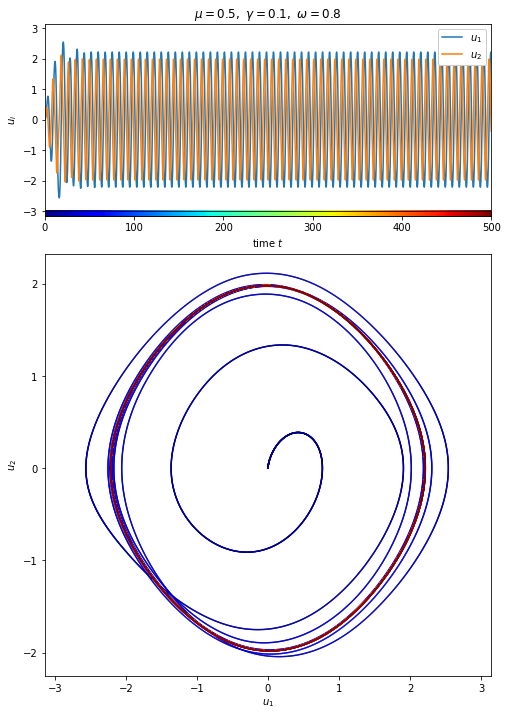

In [0]:
sim_pendulum((.5, .1, .8))

(0.0, 20000.0)


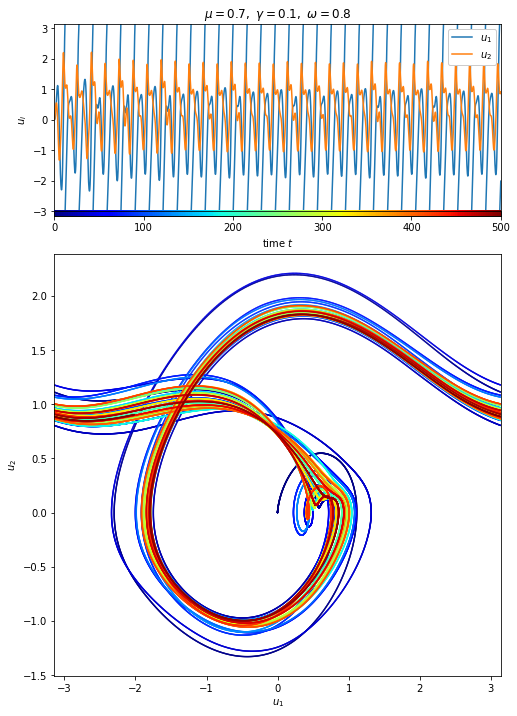

In [0]:
sim_pendulum((.7, .1, .8))

(0.0, 20000.0)


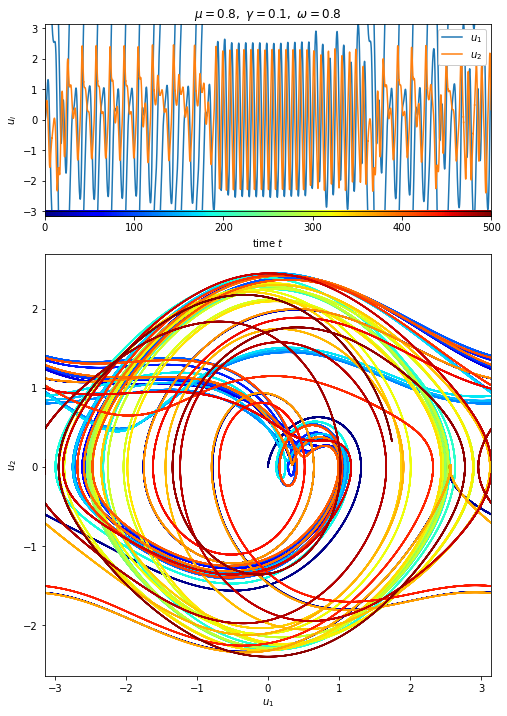

In [0]:
sim_pendulum((.8, .1, .8), t_steps=1000000)

(0.0, 20000.0)


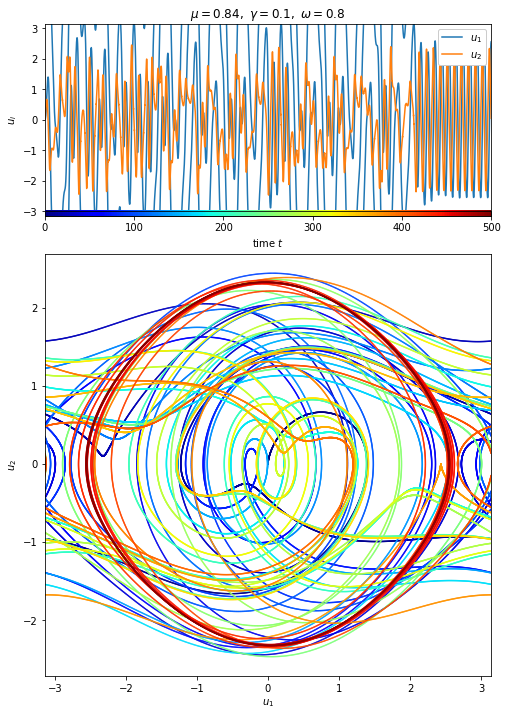

In [0]:
sim_pendulum((.84, .1, .8))

(0.0, 20000.0)


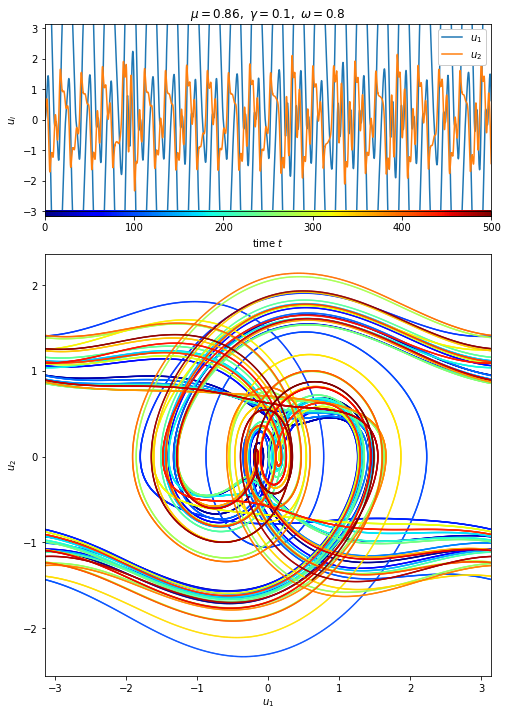

In [0]:
sim_pendulum((.86, .1, .8))

(0.0, 20000.0)


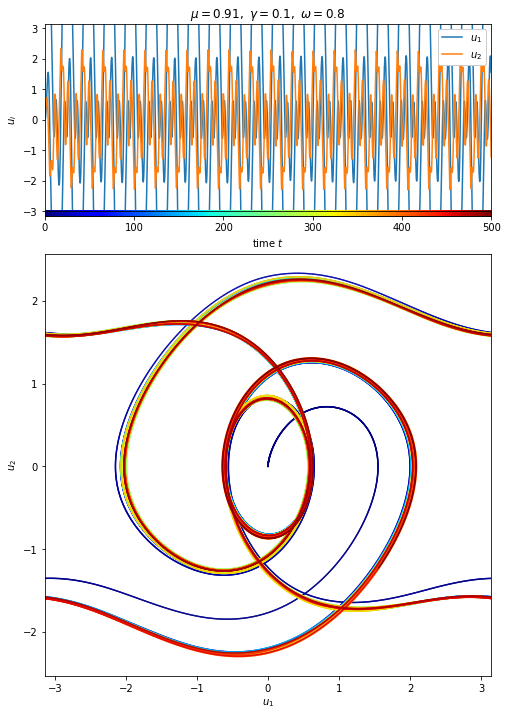

In [0]:
sim_pendulum((.91, .1, .8))

(0.0, 20000.0)


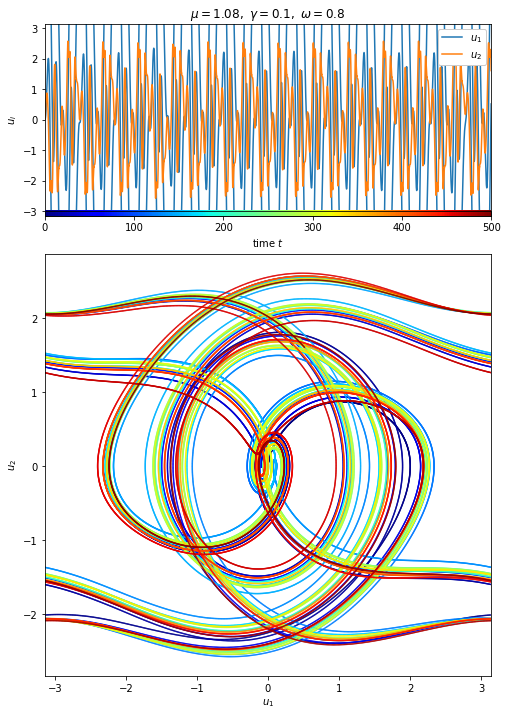

In [0]:
sim_pendulum((1.08, .1, .8))

(0.0, 20000.0)


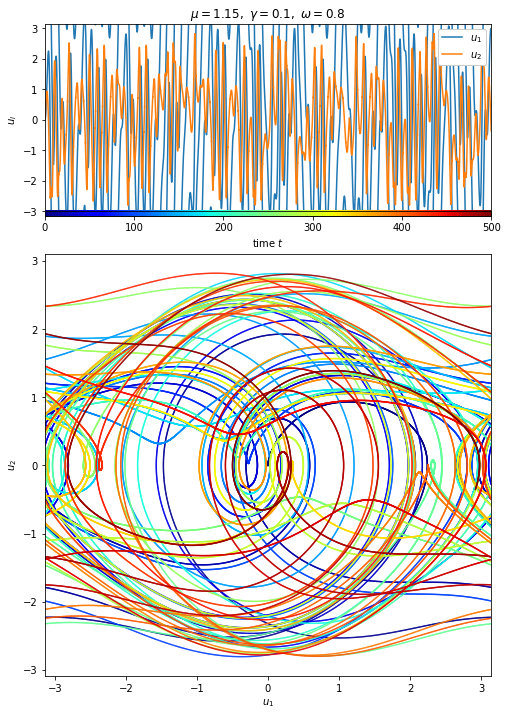

In [0]:
sim_pendulum((1.15, .1, .8))